<a href="https://colab.research.google.com/github/Jael12Hephzibah/Data-Analytics/blob/main/WINE_QUALITY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
df=pd.read_csv("WineQT.csv")

In [ ]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595


In [ ]:
df.nunique()

fixed acidity             91
volatile acidity         135
citric acid               77
residual sugar            80
chlorides                131
free sulfur dioxide       53
total sulfur dioxide     138
density                  388
pH                        87
sulphates                 89
alcohol                   61
quality                    6
Id                      1143
dtype: int64

In [ ]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [ ]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'Id'],
      dtype='object')

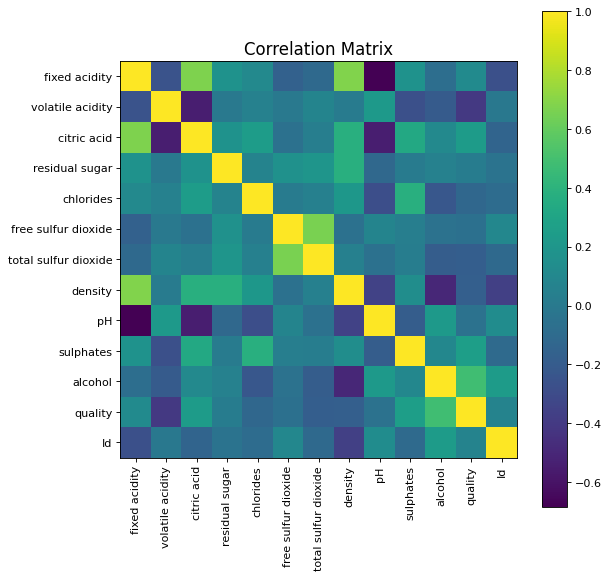

In [ ]:
def plotCorrelationMatrix(df, graphWidth):
    numeric_df = df.select_dtypes(include=['number'])  # Select only numeric columns
    corr = numeric_df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum=1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title('Correlation Matrix', fontsize=15)
    plt.show()

plotCorrelationMatrix(df, 8)


In [ ]:
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]]
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = int(np.ceil(nCol / nGraphPerRow))
    plt.figure(num=None, figsize=(6 * nGraphPerRow, 8 * nGraphRow), dpi=80, facecolor='w', edgecolor='k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation=90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad=1.0, w_pad=1.0, h_pad=1.0)
    plt.show()

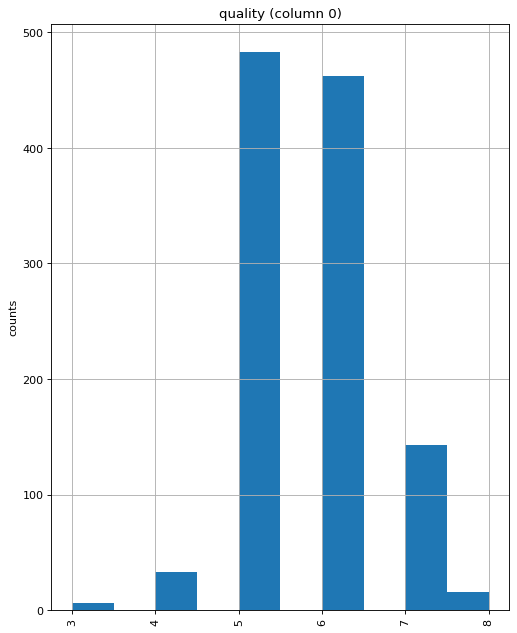

In [ ]:
plotPerColumnDistribution(df, 10, 5)

In [ ]:
def check_empty_values(df):
    has_empty = df.isnull().values.any()
    if has_empty:
        print("There are empty values in the DataFrame.")
        empty_values_per_column = df.isnull().sum()
        print("Number of empty values per column:")
        print(empty_values_per_column)
        rows_with_empty_values = df[df.isnull().any(axis=1)]
        print("Rows with empty values:")
        print(rows_with_empty_values.index.tolist()) # Using .index.tolist() to display row indices
    else:
        print("There are no empty values in the DataFrame.")

In [ ]:
check_empty_values(df)

There are no empty values in the DataFrame.


In [ ]:
X = df.drop(columns=['quality', 'Id'])
y = df['quality']

In [ ]:
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2


In [ ]:
y

0       5
1       5
2       5
3       6
4       5
       ..
1138    6
1139    6
1140    5
1141    6
1142    5
Name: quality, Length: 1143, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

le = LabelEncoder()
y = le.fit_transform(y)

In [ ]:
y.shape

(1143,)

In [ ]:
y

array([2, 2, 2, ..., 2, 3, 2])

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
X_scaled.shape

(1143, 11)

In [ ]:
X_scaled

array([[-0.52157961,  0.93933222, -1.36502663, ...,  1.27069495,
        -0.57365783, -0.96338181],
       [-0.29259344,  1.94181282, -1.36502663, ..., -0.70892755,
         0.1308811 , -0.59360107],
       [-0.29259344,  1.27349242, -1.16156762, ..., -0.32577481,
        -0.04525363, -0.59360107],
       ...,
       [-1.20853813,  0.38239855, -0.9581086 , ...,  0.88754221,
        -0.45623467,  0.05351522],
       [-1.38027776,  0.10393172, -0.8563791 , ...,  1.33455374,
         0.60057372,  0.70063152],
       [-1.38027776,  0.6330187 , -0.75464959, ...,  1.65384769,
         0.30701583, -0.22382033]])

In [ ]:
class_values = df['quality'].unique()
print("Class values:", class_values)

Class values: [5 6 7 4 8 3]


In [ ]:
number_of_classes = len(class_values)
print("Number of classes:", number_of_classes)

Number of classes: 6


In [ ]:
class_counts = df['quality'].value_counts()
print(class_counts)

quality
5    483
6    462
7    143
4     33
8     16
3      6
Name: count, dtype: int64


In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='auto')
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

In [ ]:
from keras.utils import to_categorical
y_resampled_encoded = to_categorical(y_resampled)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled_encoded,
                            test_size=0.2, random_state=42,stratify=y_resampled_encoded)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(number_of_classes, activation='softmax'))


In [ ]:
from keras.optimizers import Adam
optimizer = Adam(learning_rate=0.0001)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])


In [ ]:
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

In [ ]:
history=model.fit(X_train, y_train, epochs=1000, batch_size=64,
                  validation_data=(X_test, y_test),callbacks=[early_stopping])

Epoch 1/1000
37/37 [==============================] - 2s 9ms/step - loss: 1.8557 - accuracy: 0.1566 - val_loss: 1.8267 - val_accuracy: 0.1621
Epoch 2/1000
37/37 [==============================] - 0s 3ms/step - loss: 1.8083 - accuracy: 0.1648 - val_loss: 1.7840 - val_accuracy: 0.1828
Epoch 3/1000
37/37 [==============================] - 0s 3ms/step - loss: 1.7690 - accuracy: 0.2079 - val_loss: 1.7472 - val_accuracy: 0.2259
Epoch 4/1000
37/37 [==============================] - 0s 3ms/step - loss: 1.7357 - accuracy: 0.2558 - val_loss: 1.7157 - val_accuracy: 0.2914
Epoch 5/1000
37/37 [==============================] - 0s 3ms/step - loss: 1.7066 - accuracy: 0.3003 - val_loss: 1.6893 - val_accuracy: 0.3086
Epoch 6/1000
37/37 [==============================] - 0s 4ms/step - loss: 1.6801 - accuracy: 0.3197 - val_loss: 1.6630 - val_accuracy: 0.3121
Epoch 7/1000
37/37 [==============================] - 0s 3ms/step - loss: 1.6541 - accuracy: 0.3387 - val_loss: 1.6371 - val_accuracy: 0.3328
Epoch 

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
print("Accuracy:", accuracy)

19/19 [==============================] - 0s 2ms/step - loss: 0.4698 - accuracy: 0.8190
Accuracy: 0.818965494632721


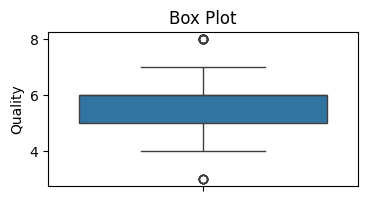

In [ ]:
plt.figure(figsize=(4, 2))
sns.boxplot(data=df, y='quality')
plt.title('Box Plot')
plt.ylabel('Quality')
plt.show()

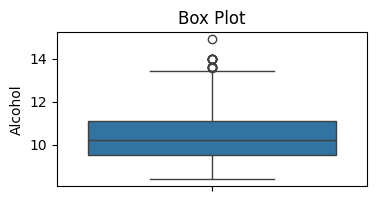

In [ ]:
plt.figure(figsize=(4, 2))
sns.boxplot(data=df, y='alcohol')
plt.title('Box Plot')
plt.ylabel('Alcohol')
plt.show()

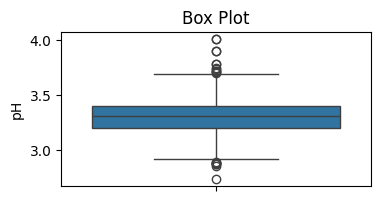

In [ ]:
plt.figure(figsize=(4, 2))
sns.boxplot(data=df, y='pH')
plt.title('Box Plot')
plt.ylabel('pH')
plt.show()

<ipython-input-44-790ed72f41c5>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df, x='quality', palette='plasma')


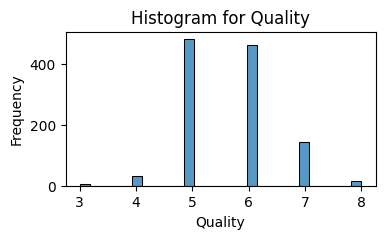

In [ ]:
plt.figure(figsize=(4,2))
sns.histplot(data=df, x='quality', palette='plasma')
plt.title('Histogram for Quality')
plt.xlabel('Quality')
plt.ylabel('Frequency')
plt.show()

<ipython-input-46-86890a659aa5>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df, x='sulphates', palette='magma')


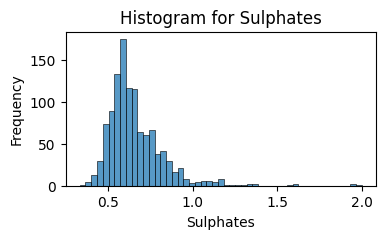

In [ ]:
plt.figure(figsize=(4,2))
sns.histplot(data=df, x='sulphates', palette='magma')
plt.title('Histogram for Sulphates')
plt.xlabel('Sulphates')
plt.ylabel('Frequency')
plt.show()

<ipython-input-53-f72a0009021b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='alcohol', y='quality', data=df, palette='viridis')


Text(0, 0.5, 'Quality')

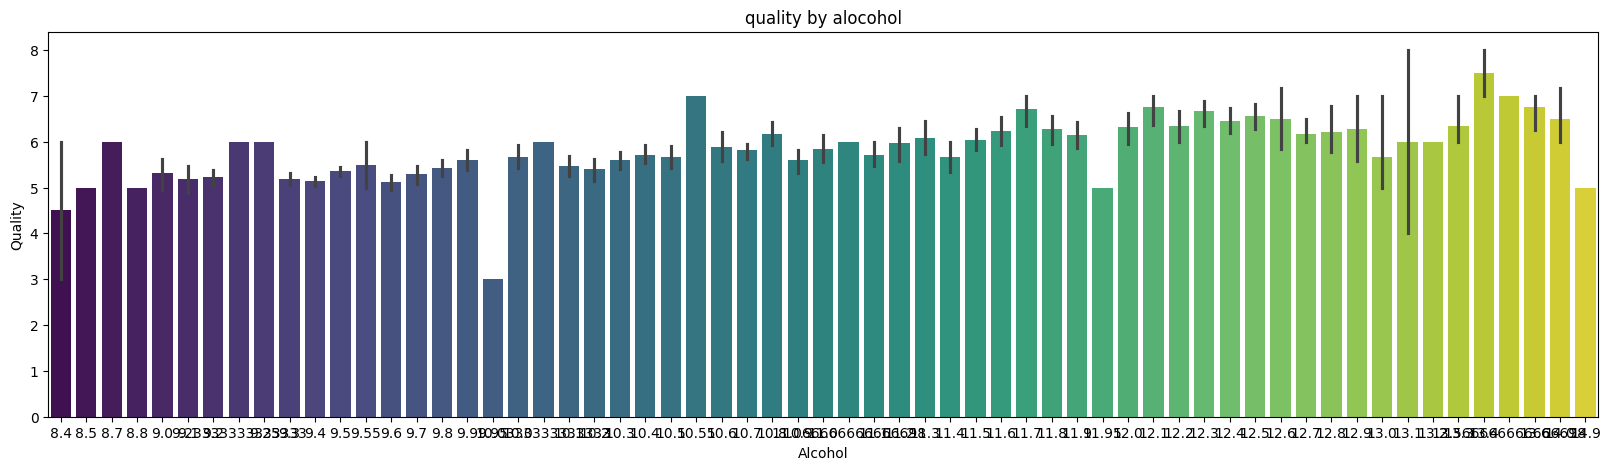

In [ ]:
plt.figure(figsize=(20,5))
sns.barplot(x='alcohol', y='quality', data=df, palette='viridis')
plt.title('quality by alocohol')
plt.xlabel('Alcohol')
plt.ylabel('Quality')

<ipython-input-57-47b0f39846aa>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='fixed acidity', y='volatile acidity', data=df, palette='magma')


Text(0, 0.5, 'Principal Component 2 (pc2)')

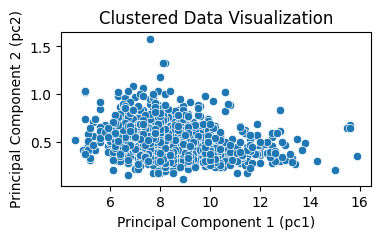

In [ ]:
plt.figure(figsize=(4,2))
sns.scatterplot(x='fixed acidity', y='volatile acidity', data=df, palette='magma')
plt.title('Clustered Data Visualization')
plt.xlabel('Principal Component 1 (pc1)')
plt.ylabel('Principal Component 2 (pc2)')

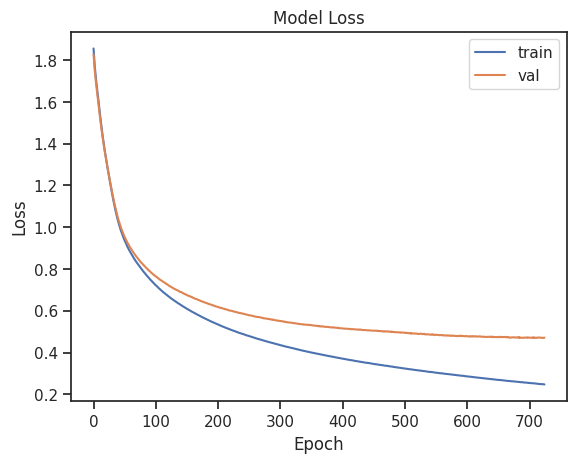

In [ ]:

plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


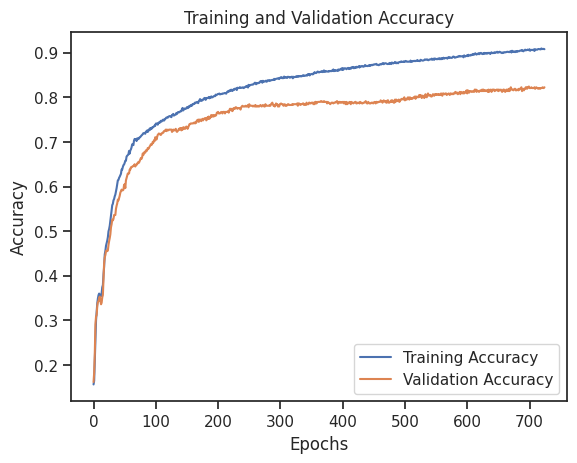

In [ ]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
plt.plot(accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

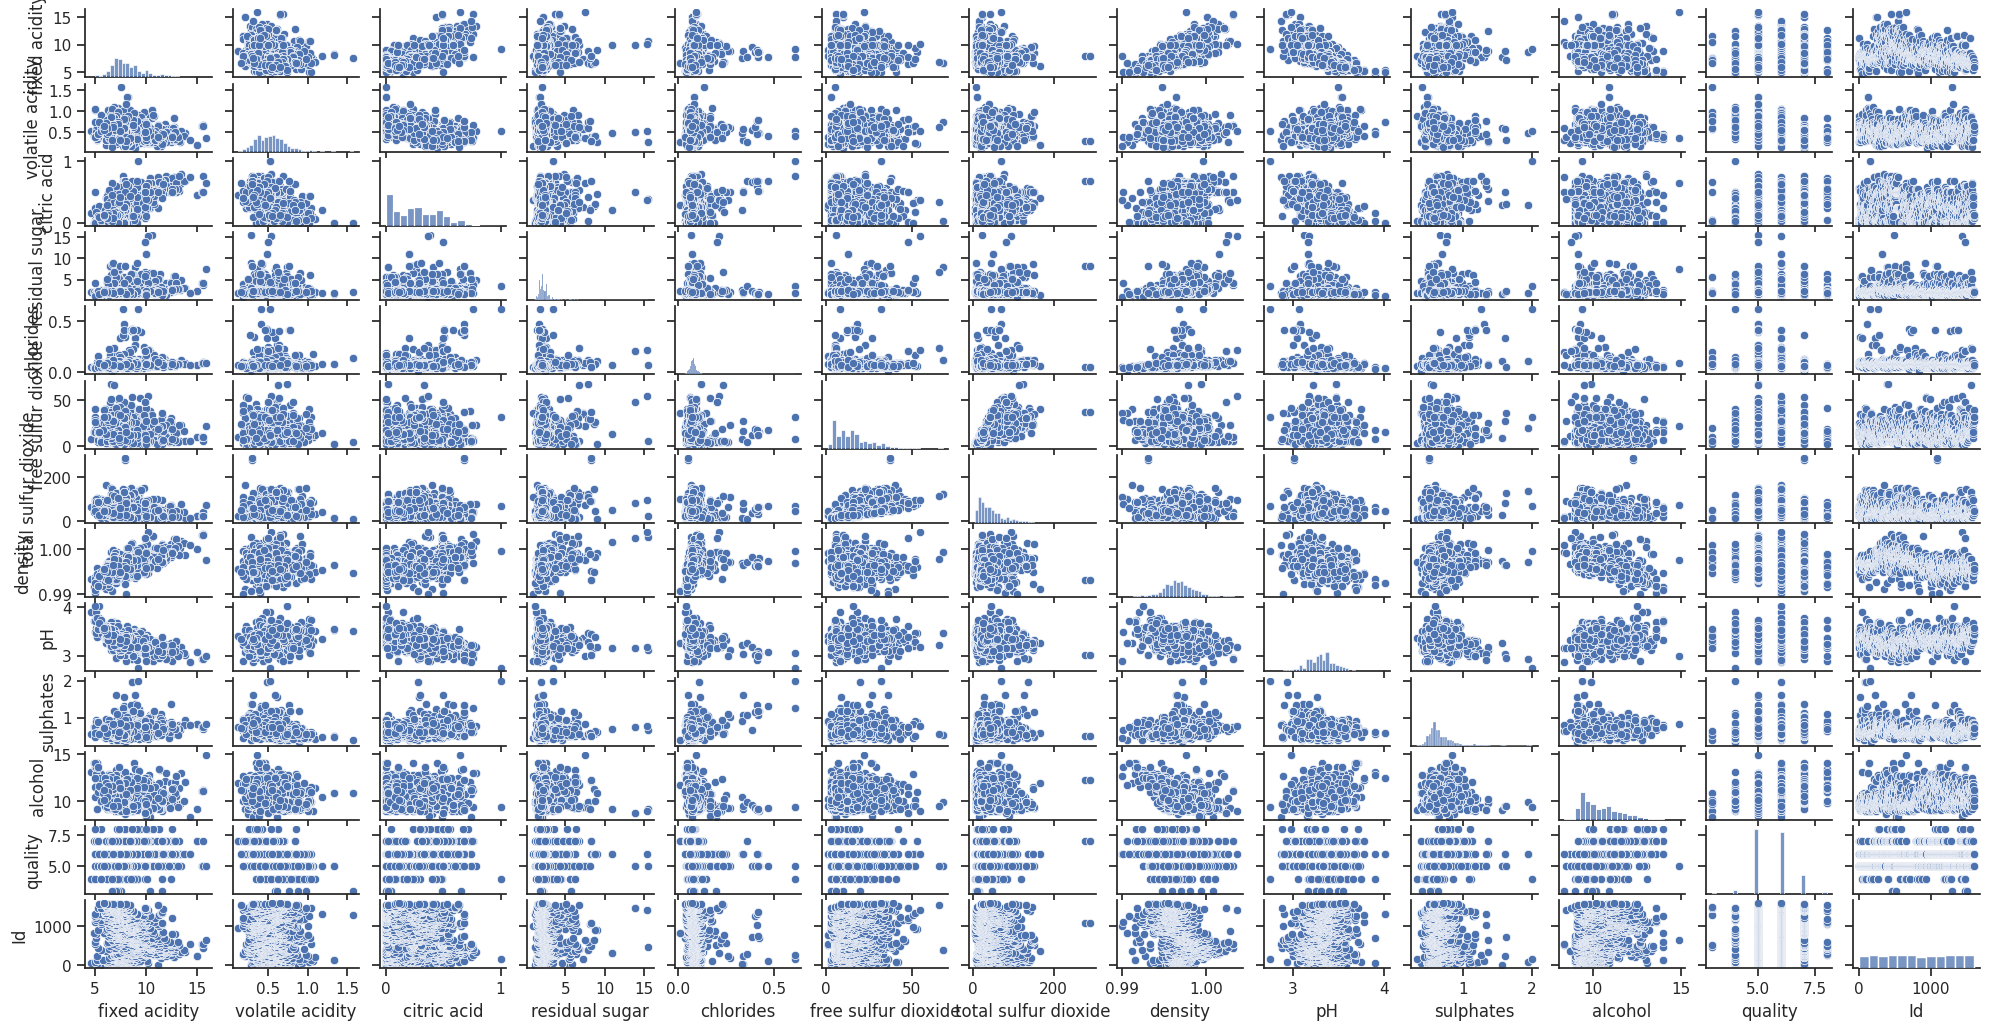

In [ ]:
def plotScatterMatrix(df, graphWidth, graphHeight):
    sns.set(style="ticks")
    sns.pairplot(df)
    plt.gcf().set_size_inches(graphWidth, graphHeight)
    plt.show()
plotScatterMatrix(df, 20, 10)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                768       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
 dense_3 (Dense)             (None, 6)                 66        
                                                                 
Total params: 3244 (12.67 KB)
Trainable params: 3244 (12.67 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


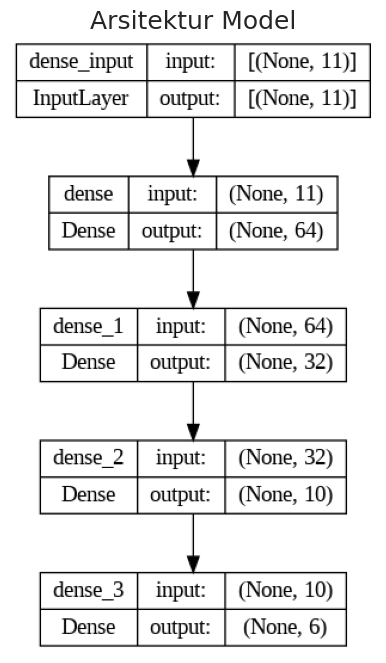

In [ ]:
from keras.utils import plot_model
file_name = 'arsitektur_model.png'
plot_model(model, to_file=file_name, show_shapes=True, show_layer_names=True)
plt.figure(figsize=(8,8))
img = plt.imread(file_name)
plt.imshow(img)
plt.title('Arsitektur Model', fontsize=18)
plt.axis('off')
plt.savefig(file_name)
plt.show()

In [ ]:
from sklearn.metrics import classification_report
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
class_values = df['quality'].unique()
target_names = [str(class_value) for class_value in class_values]
y_test_classes = np.argmax(y_test, axis=1)
report = classification_report(y_test_classes, y_pred_classes,target_names=target_names)
print(report)

19/19 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           5       0.99      1.00      0.99        97
           6       0.90      0.95      0.92        97
           7       0.68      0.58      0.63        97
           4       0.58      0.57      0.57        97
           8       0.78      0.82      0.80        96
           3       0.94      1.00      0.97        96

    accuracy                           0.82       580
   macro avg       0.81      0.82      0.81       580
weighted avg       0.81      0.82      0.81       580



19/19 [==============================] - 0s 2ms/step


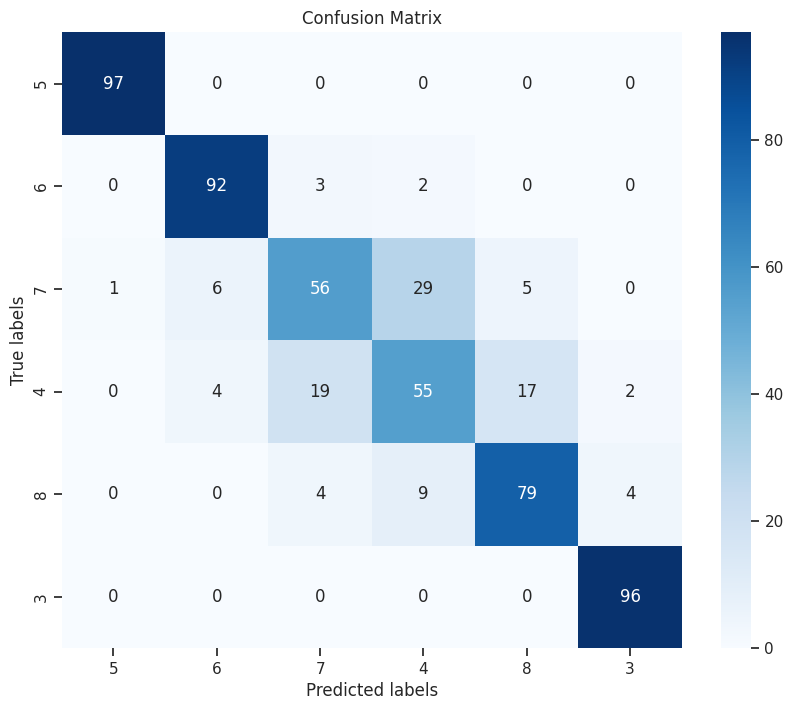

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)
cm = confusion_matrix(y_test_classes, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

<ipython-input-61-602355d1a277>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='chlorides', data=chlorides_count, palette='plasma')


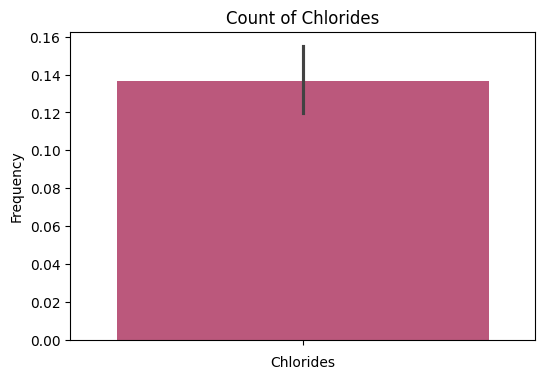

In [ ]:
chlorides_count = df['chlorides'].value_counts().reset_index()
plt.figure(figsize=(6,4))
sns.barplot(y='chlorides', data=chlorides_count, palette='plasma')
plt.title('Count of Chlorides')
plt.xlabel('Chlorides')
plt.ylabel('Frequency')
plt.show()


<ipython-input-65-e56805a7361f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='density', data=chlorides_count, palette='dark')


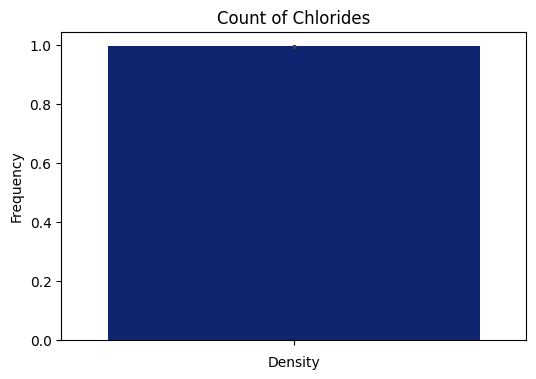

In [ ]:
chlorides_count = df['density'].value_counts().reset_index()
plt.figure(figsize=(6,4))
sns.barplot(y='density', data=chlorides_count, palette='dark')
plt.title('Count of Chlorides')
plt.xlabel('Density')
plt.ylabel('Frequency')
plt.show()

<ipython-input-71-c64fbbb98870>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y='alcohol', data=df, palette='viridis')


Text(0.5, 1.0, 'Boxplot of Alcohol')

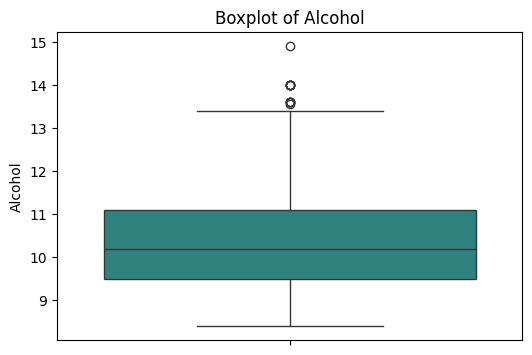

In [ ]:
plt.figure(figsize=(6,4))
sns.boxplot(y='alcohol', data=df, palette='viridis')
plt.ylabel('Alcohol')
plt.title('Boxplot of Alcohol')

In [ ]:
model.save("model_wine.h5")
from keras.models import load_model
model = load_model("model_wine.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
